In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('drive/My Drive/Research Paper/Dataset/h1bdataset.csv',encoding='latin')
df1 = df.copy(deep=True) # copying the dataset
df.head()


,CASE_NUMBER,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,SOC_CODE,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE_CITY,WORKSITE_STATE_ABB,YEAR,WORKSITE_STATE_FULL,WORKSITE
0,I-200-09285-514415,CERTIFIED,IT CATS LLC,COMPUTER SYSTEMS ANALYSTS,15-1121,SENIOR BUSINESS ANALYST,Y,109116.8,"NORTH WALES,",PA,2015,PENNSYLVANIA,"NORTH WALES, PENNSYLVANIA"
1,I-200-09341-564186,CERTIFIED-WITHDRAWN,"XPERT TECHNOLOGIES, INC.","COMPUTER OCCUPATIONS, ALL OTHER*",15-1799,QUALITY ASSURANCE ANALYST,Y,58282.0,CAMP HILL,PA,2015,PENNSYLVANIA,"CAMP HILL, PENNSYLVANIA"
2,I-200-09342-274341,CERTIFIED,"ISR INFO WAY, INC.","SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,SR. SOFTWARE DEVELOPER,Y,84906.0,CHICAGO,IL,2015,ILLINOIS,"CHICAGO, ILLINOIS"
3,I-200-09364-425868,CERTIFIED,MAGIC CIRCLE FILMS INTERNATIONAL LLC,FILM AND VIDEO EDITORS,27-4032,VIDEO EDITOR,Y,39333.0,AUBURN,NY,2015,NEW YORK,"AUBURN, NEW YORK"
4,I-200-10006-413683,WITHDRAWN,SAPHIRE SOLUTIONS INC,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,15-1142,SYSTEMS ADMINISTRATOR,Y,68638.0,BETHPAGE,NY,2015,NEW YORK,"BETHPAGE, NEW YORK"


In [ ]:
df.drop('WORKSITE_STATE_FULL',inplace=True,axis=1)
df.drop('CASE_NUMBER',inplace=True,axis=1)
df.drop('YEAR',inplace=True,axis=1)
df.drop('WORKSITE_CITY',inplace=True,axis=1)
df.drop('WORKSITE_STATE_ABB',inplace=True,axis=1)
df.drop('SOC_NAME',inplace=True,axis=1)
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_CODE,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE
0,CERTIFIED,IT CATS LLC,15-1121,SENIOR BUSINESS ANALYST,Y,109116.8,"NORTH WALES, PENNSYLVANIA"
1,CERTIFIED-WITHDRAWN,"XPERT TECHNOLOGIES, INC.",15-1799,QUALITY ASSURANCE ANALYST,Y,58282.0,"CAMP HILL, PENNSYLVANIA"
2,CERTIFIED,"ISR INFO WAY, INC.",15-1132,SR. SOFTWARE DEVELOPER,Y,84906.0,"CHICAGO, ILLINOIS"
3,CERTIFIED,MAGIC CIRCLE FILMS INTERNATIONAL LLC,27-4032,VIDEO EDITOR,Y,39333.0,"AUBURN, NEW YORK"
4,WITHDRAWN,SAPHIRE SOLUTIONS INC,15-1142,SYSTEMS ADMINISTRATOR,Y,68638.0,"BETHPAGE, NEW YORK"


In [ ]:
df.drop(df.index[(df["CASE_STATUS"] == "WITHDRAWN")],axis=0,inplace=True)
df.drop(df.index[(df["CASE_STATUS"] == "CERTIFIED-WITHDRAWN")],axis=0,inplace=True)

In [ ]:
print('WITHDRAWN' in set(df['CASE_STATUS']))

False


In [ ]:
print('CERTIFIED-WITHDRAWN' in set(df['CASE_STATUS']))

False


In [ ]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_CODE,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE
0,CERTIFIED,IT CATS LLC,15-1121,SENIOR BUSINESS ANALYST,Y,109116.8,"NORTH WALES, PENNSYLVANIA"
2,CERTIFIED,"ISR INFO WAY, INC.",15-1132,SR. SOFTWARE DEVELOPER,Y,84906.0,"CHICAGO, ILLINOIS"
3,CERTIFIED,MAGIC CIRCLE FILMS INTERNATIONAL LLC,27-4032,VIDEO EDITOR,Y,39333.0,"AUBURN, NEW YORK"
5,CERTIFIED,"SUNERA TECHNOLOGIES, INC",15-1131,PROGRAMMER ANALYST,Y,61901.0,"TROY, MICHIGAN"
7,CERTIFIED,LIANG LLC,13-2051,FINANCIAL ANALYST,N,49108.8,"CARBONDALE, ILLINOIS"


In [ ]:
dff=df.dropna()


In [ ]:
dff.isnull().sum()

CASE_STATUS           0
EMPLOYER_NAME         0
SOC_CODE              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
WORKSITE              0
dtype: int64

In [ ]:
Q1 = np.percentile(dff['PREVAILING_WAGE'] , 25)
Q3 = np.percentile(dff['PREVAILING_WAGE'] , 75)

In [ ]:
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR

In [ ]:
outliers = dff['PREVAILING_WAGE'][(dff['PREVAILING_WAGE'] > ul) | (dff['PREVAILING_WAGE'] < ll)]
outliers

53        170394.0
902       133515.0
2540      205650.0
3545      129355.0
3601      179254.0
            ...   
856976    131893.0
856981    131893.0
856984    131893.0
856985    131893.0
857191    161220.8
Name: PREVAILING_WAGE, Length: 32303, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


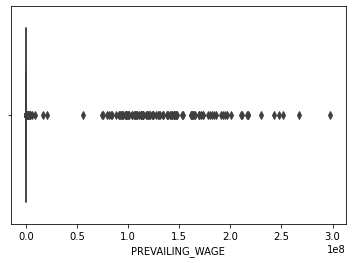

In [ ]:

sns.boxplot(dff["PREVAILING_WAGE"])

In [ ]:
dff["PREVAILING_WAGE"] = np.where(dff["PREVAILING_WAGE"]  >ul, ul,dff["PREVAILING_WAGE"] )
dff["PREVAILING_WAGE"] = np.where(dff["PREVAILING_WAGE"]  <ll, ll,dff["PREVAILING_WAGE"] )

<ipython-input-16-e36e83086bfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["PREVAILING_WAGE"] = np.where(dff["PREVAILING_WAGE"]  >ul, ul,dff["PREVAILING_WAGE"] )
<ipython-input-16-e36e83086bfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["PREVAILING_WAGE"] = np.where(dff["PREVAILING_WAGE"]  <ll, ll,dff["PREVAILING_WAGE"] )


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


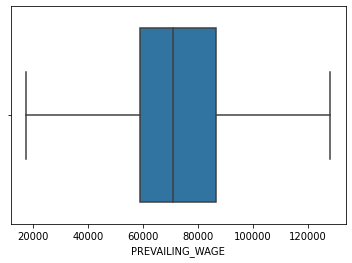

In [ ]:
sns.boxplot(dff["PREVAILING_WAGE"])

In [ ]:
dff.skew(axis=0,skipna=True)

<ipython-input-18-45d893576406>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dff.skew(axis=0,skipna=True)


PREVAILING_WAGE    0.68603
dtype: float64

In [ ]:

dff.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
dff.isnull().sum()

CASE_STATUS           0
EMPLOYER_NAME         0
SOC_CODE              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
WORKSITE              0
dtype: int64

In [ ]:
dff['CASE_STATUS'].value_counts()

CERTIFIED    765088
DENIED        11759
Name: CASE_STATUS, dtype: int64

In [ ]:
(dff['CASE_STATUS'].value_counts()) / len(df) * 100

CERTIFIED    98.483401
DENIED        1.513638
Name: CASE_STATUS, dtype: float64

In [ ]:
ndf=dff.groupby('CASE_STATUS', group_keys=False).apply(lambda x: x.sample(11759))

In [ ]:
ndf.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_CODE,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE
680573,CERTIFIED,CLARKSON UNIVERSITY,25-1032,ASSISTANT PROFESSOR,Y,73977.0,"POTSDAM, NEW YORK"
121306,CERTIFIED,"NAVISTAR, INC.",17-2141,PRODUCT DEVELOPMENT ENGINEER SENIOR TEAM LEAD,Y,90771.0,"LISLE, ILLINOIS"
230985,CERTIFIED,AMERICAN TECHNOLOGY LABS INC,15-1131,PROGRAMMER ANALYST,N,54038.0,"MOUNDS VIEW, MINNESOTA"
704179,CERTIFIED,BRIGHT SIDE BROOKLYN LLC,13-1161,MARKETING SPECIALIST,Y,47340.8,"BROOKLYN, NEW YORK"
764173,CERTIFIED,DELOITTE CONSULTING LLP,15-1132,SOLUTION ANALYST,Y,58219.0,"Mechanicsburg, PENNSYLVANIA"


In [ ]:
ndf['CASE_STATUS'].value_counts()

CERTIFIED    11759
DENIED       11759
Name: CASE_STATUS, dtype: int64

In [ ]:
(ndf['CASE_STATUS'].value_counts()) / len(ndf) * 100

CERTIFIED    50.0
DENIED       50.0
Name: CASE_STATUS, dtype: float64

In [ ]:
ndf.skew(axis=0,skipna=True)

<ipython-input-27-8a3a1e2ff9d2>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ndf.skew(axis=0,skipna=True)


PREVAILING_WAGE    0.615146
dtype: float64

In [ ]:
for x in ndf.columns:
    #prinfting unique values
    print(x ,':', len(ndf[x].unique()))

CASE_STATUS : 2
EMPLOYER_NAME : 10898
SOC_CODE : 478
JOB_TITLE : 8142
FULL_TIME_POSITION : 2
PREVAILING_WAGE : 5982
WORKSITE : 1964


In [ ]:
ndf['CASE_STATUS'].replace(['CERTIFIED', 'DENIED'],[1, 0], inplace=True)
ndf['FULL_TIME_POSITION'].replace(['Y', 'N'],[1, 0], inplace=True)

In [ ]:
ndf.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_CODE,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE
680573,1,CLARKSON UNIVERSITY,25-1032,ASSISTANT PROFESSOR,1,73977.0,"POTSDAM, NEW YORK"
121306,1,"NAVISTAR, INC.",17-2141,PRODUCT DEVELOPMENT ENGINEER SENIOR TEAM LEAD,1,90771.0,"LISLE, ILLINOIS"
230985,1,AMERICAN TECHNOLOGY LABS INC,15-1131,PROGRAMMER ANALYST,0,54038.0,"MOUNDS VIEW, MINNESOTA"
704179,1,BRIGHT SIDE BROOKLYN LLC,13-1161,MARKETING SPECIALIST,1,47340.8,"BROOKLYN, NEW YORK"
764173,1,DELOITTE CONSULTING LLP,15-1132,SOLUTION ANALYST,1,58219.0,"Mechanicsburg, PENNSYLVANIA"


In [ ]:
matrix = ndf.corr()
print(matrix)

                    CASE_STATUS  FULL_TIME_POSITION  PREVAILING_WAGE
CASE_STATUS            1.000000             0.05653         0.070743
FULL_TIME_POSITION     0.056530             1.00000         0.272890
PREVAILING_WAGE        0.070743             0.27289         1.000000


In [ ]:
encoder= ce.BinaryEncoder(cols=['EMPLOYER_NAME','SOC_CODE','JOB_TITLE','WORKSITE'],return_df=True)
nndf=encoder.fit_transform(ndf) 
nndf

,CASE_STATUS,EMPLOYER_NAME_0,EMPLOYER_NAME_1,EMPLOYER_NAME_2,EMPLOYER_NAME_3,EMPLOYER_NAME_4,EMPLOYER_NAME_5,EMPLOYER_NAME_6,EMPLOYER_NAME_7,EMPLOYER_NAME_8,...,WORKSITE_1,WORKSITE_2,WORKSITE_3,WORKSITE_4,WORKSITE_5,WORKSITE_6,WORKSITE_7,WORKSITE_8,WORKSITE_9,WORKSITE_10
680573,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
121306,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
230985,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
704179,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
764173,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172209,0,0,0,0,1,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
128376,0,1,0,0,0,1,0,0,1,0,...,0,1,0,1,1,0,0,0,1,1
131736,0,0,0,0,0,0,0,1,1,0,...,1,1,1,0,1,0,1,1,0,0
255575,0,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [ ]:
#ohe = OneHotEncoder()
#nndf=pd.DataFrame(ohe.fit_transform(ndf[['EMPLOYER_NAME','SOC_CODE','JOB_TITLE','WORKSITE']]))

In [ ]:
#ndf.drop('EMPLOYER_NAME',inplace=True,axis=1)
#ndf.drop('SOC_CODE',inplace=True,axis=1)
#ndf.drop('WORKSITE',inplace=True,axis=1)
#ndf.drop('JOB_TITLE',inplace=True,axis=1)

In [ ]:
#nnndf=ndf.join(nndf, lsuffix='suffix_name', rsuffix='suffix_name')

In [ ]:
#nnndf.drop('EMPLOYER_NAME',inplace=True,axis=1)
#nnndf.drop('SOC_CODE',inplace=True,axis=1)
#nnndf.drop('WORKSITE',inplace=True,axis=1)
#nnndf.drop('JOB_TITLE',inplace=True,axis=1)
#print(nndf.FULL_TIME_POSITION)
nndf

,CASE_STATUS,EMPLOYER_NAME_0,EMPLOYER_NAME_1,EMPLOYER_NAME_2,EMPLOYER_NAME_3,EMPLOYER_NAME_4,EMPLOYER_NAME_5,EMPLOYER_NAME_6,EMPLOYER_NAME_7,EMPLOYER_NAME_8,...,WORKSITE_1,WORKSITE_2,WORKSITE_3,WORKSITE_4,WORKSITE_5,WORKSITE_6,WORKSITE_7,WORKSITE_8,WORKSITE_9,WORKSITE_10
680573,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
121306,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
230985,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
704179,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
764173,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172209,0,0,0,0,1,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
128376,0,1,0,0,0,1,0,0,1,0,...,0,1,0,1,1,0,0,0,1,1
131736,0,0,0,0,0,0,0,1,1,0,...,1,1,1,0,1,0,1,1,0,0
255575,0,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [ ]:

minmax_scaler = MinMaxScaler()
#nndf['PREVAILING_WAGE']= minmax_scaler.fit_transform(nndf['PREVAILING_WAGE'])
nndf['PREVAILING_WAGE']= minmax_scaler.fit_transform(nndf[['PREVAILING_WAGE']])
##nnndf[['PREVAILING_WAGE']]= minmax_scaler.fit_transform(nnndf[['PREVAILING_WAGE']])


In [ ]:
nndf

,CASE_STATUS,EMPLOYER_NAME_0,EMPLOYER_NAME_1,EMPLOYER_NAME_2,EMPLOYER_NAME_3,EMPLOYER_NAME_4,EMPLOYER_NAME_5,EMPLOYER_NAME_6,EMPLOYER_NAME_7,EMPLOYER_NAME_8,...,WORKSITE_1,WORKSITE_2,WORKSITE_3,WORKSITE_4,WORKSITE_5,WORKSITE_6,WORKSITE_7,WORKSITE_8,WORKSITE_9,WORKSITE_10
680573,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
121306,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
230985,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
704179,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
764173,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172209,0,0,0,0,1,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
128376,0,1,0,0,0,1,0,0,1,0,...,0,1,0,1,1,0,0,0,1,1
131736,0,0,0,0,0,0,0,1,1,0,...,1,1,1,0,1,0,1,1,0,0
255575,0,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [ ]:
Y=pd.DataFrame(nndf['CASE_STATUS'])

In [ ]:
print(Y)

        CASE_STATUS
680573            1
121306            1
230985            1
704179            1
764173            1
...             ...
172209            0
128376            0
131736            0
255575            0
453557            0

[23518 rows x 1 columns]


In [ ]:
nndf.drop('CASE_STATUS',inplace=True,axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
nndf_train,nndf_test,Y_train,Y_test=train_test_split(nndf,Y,test_size=0.2)


In [ ]:
import tensorflow as tf
# Initializing the ANN
ann = tf.keras.models.Sequential()
# Add the input layer and first hidden layer
#ann.add(tf.keras.layers.Dense(units=1024, activation='relu'))
ann.add(tf.keras.layers.Dense(units=512, activation='relu'))
# Add the second hidden layer
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))

ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
# Add the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(nndf_train, Y_train, batch_size = 24, epochs = 15)

Epoch 1/10
37/37 [==============================] - 3s 20ms/step - loss: 0.4891 - accuracy: 0.7856
Epoch 2/10
37/37 [==============================] - 1s 22ms/step - loss: 0.3757 - accuracy: 0.8510
Epoch 3/10
37/37 [==============================] - 1s 22ms/step - loss: 0.3330 - accuracy: 0.8636
Epoch 4/10
37/37 [==============================] - 1s 24ms/step - loss: 0.3036 - accuracy: 0.8759
Epoch 5/10
37/37 [==============================] - 1s 21ms/step - loss: 0.2768 - accuracy: 0.8856
Epoch 6/10
37/37 [==============================] - 1s 24ms/step - loss: 0.2652 - accuracy: 0.8902
Epoch 7/10
37/37 [==============================] - 1s 23ms/step - loss: 0.2589 - accuracy: 0.8927
Epoch 8/10
37/37 [==============================] - 1s 24ms/step - loss: 0.2423 - accuracy: 0.8994
Epoch 9/10
37/37 [==============================] - 1s 21ms/step - loss: 0.2301 - accuracy: 0.9040
Epoch 10/10
37/37 [==============================] - 1s 21ms/step - loss: 0.2188 - accuracy: 0.9085


In [ ]:
Y_pred = ann.predict(nndf_test)
Y_pred = (Y_pred > 0.7)
pd.DataFrame(list(zip(Y_test, Y_pred)), columns=['Actual', 'Predicted'])

147/147 [==============================] - 1s 4ms/step


,Actual,Predicted
0,CASE_STATUS,[False]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[1901  478]
 [ 113 2212]]
0.8743622448979592
